# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [2]:
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


In [4]:
print(df.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour'],
      dtype='object')


## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [5]:
df.head(4)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3


In [6]:
df.shape

(10886, 19)

In [7]:
min_date = df.index.min() 
max_date = df.index.max()
print(f"Період: від {min_date} до {max_date}")

Період: від 2011-01-01 00:00:00 до 2012-12-19 23:00:00


Період данних з Першого січня 2011 року до 19го грудня 2012 року.

В дата сеті 10886 рядків і 19 колонок 

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [8]:
count_rent = df['count'].resample('M').sum()

/var/folders/12/m3j233154jq1fqqs6wkx7dmc0000gn/T/ipykernel_16591/2438246979.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  count_rent = df['count'].resample('M').sum()


In [9]:
count_rent

datetime
2011-01-31     23552
2011-02-28     32844
2011-03-31     38735
2011-04-30     50517
2011-05-31     79713
2011-06-30     89776
2011-07-31     92848
2011-08-31     83296
2011-09-30     79104
2011-10-31     79522
2011-11-30     70889
2011-12-31     61183
2012-01-31     56332
2012-02-29     66269
2012-03-31     94766
2012-04-30    116885
2012-05-31    120434
2012-06-30    130957
2012-07-31    121769
2012-08-31    130220
2012-09-30    133425
2012-10-31    127912
2012-11-30    105551
2012-12-31     98977
Freq: ME, Name: count, dtype: int64

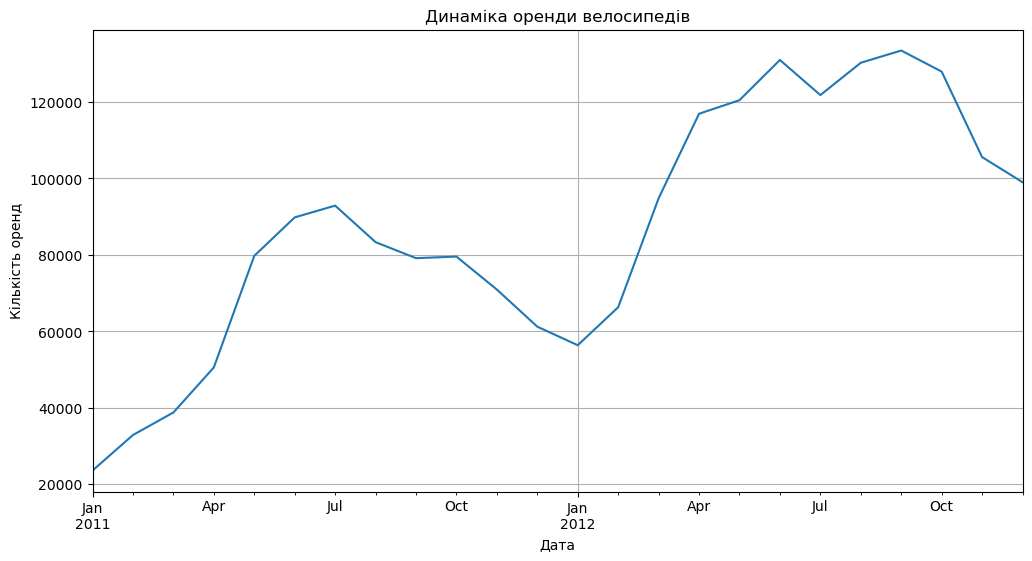

In [10]:
count_rent.plot(
    kind = 'line',
    figsize=(12, 6),
    grid=True,
    title='Динаміка оренди велосипедів',
    xlabel=("Дата"),
    ylabel=("Кількість оренд")   
)
plt.show()

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?

    Графік має заломи так як велосипеди це сезоний вид спорту переважно з травня до квітня до жовтня, також ми бачимо спад в липні - серпні 2012, ймовірно це через сильну спеку або сезон відпусток. 

2. Які загальні тенденції ви бачите на графіку?

    Що оренда зростає в теплий період року, але вона тотально не падає в холодний, можливо ця країна де відбувається орденда велосипеднів не є дуже холодною тому люди бронюють і з жовтня по квітень 

3. Чи помітні якісь сезонні коливання? 

    Так на графіку видно зміни сезонів, що досить типово для сезонних видів спорту 

4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?

    Аномально високі це травень - вересень 2012, можливо тут було розширення точок оренди чи збільшення кількості велосипедів 

    Аномально низькі грудень 2011 - січень 2012, можливо через погодні умвови 


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

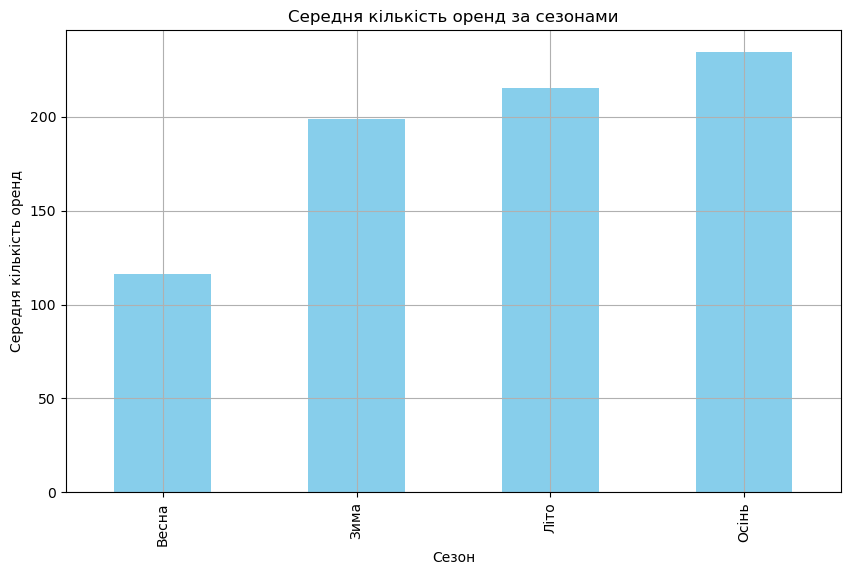

In [11]:
season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_names)

season_avg = df.groupby('season_name')['count'].mean().sort_values()

season_avg.plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    grid=True,
    title='Середня кількість оренд за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд'
)
plt.show()


**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?

Найбільша середня кількість оренди велосипедів восени.

2. Як ви можете пояснити таку сезонну закономірність?

Думаю завдяки комфортній температурі, вже не жарко і ще не холодно 

3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?м

Більше ніж у двічі

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


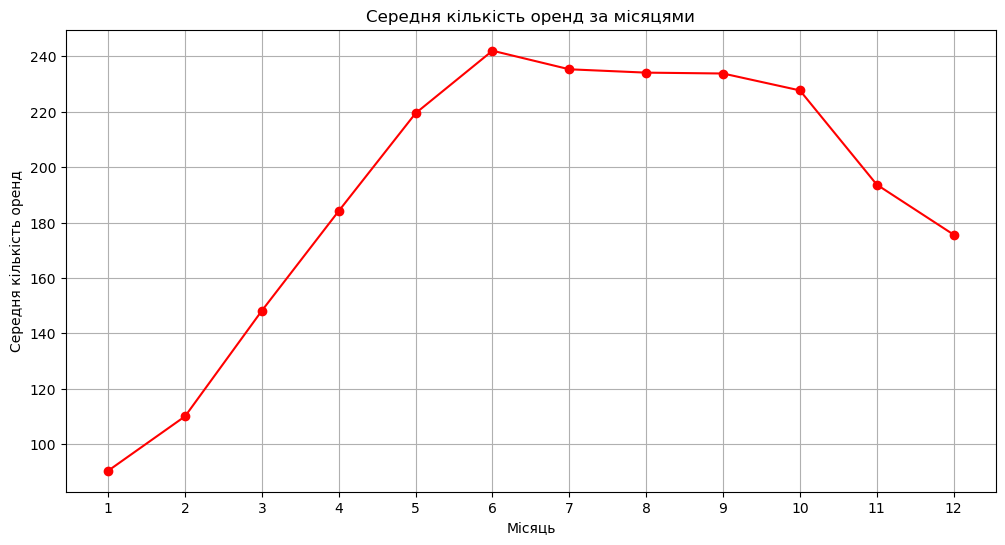

In [12]:
df['month'] = df.index.month

monthly_avg = df.groupby('month')['count'].mean()

monthly_avg.plot(
    kind='line',
    marker='o',
    color='red',
    figsize=(12, 6),
    grid=True,
    title='Середня кількість оренд за місяцями',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    xticks=range(1, 13)
)

plt.show()

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?

Пік в червні, впад в січні 

2. Чи збігається ця закономірність з результатами з попереднього завдання?

Так збігається, в попередньому графіку стабільно найвища середня оренда літо, початок - середина осіні 

3. Як може вплинути клімат на оренду велосипедів протягом року?

Звісно, і це ми бачимо на графіку 

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

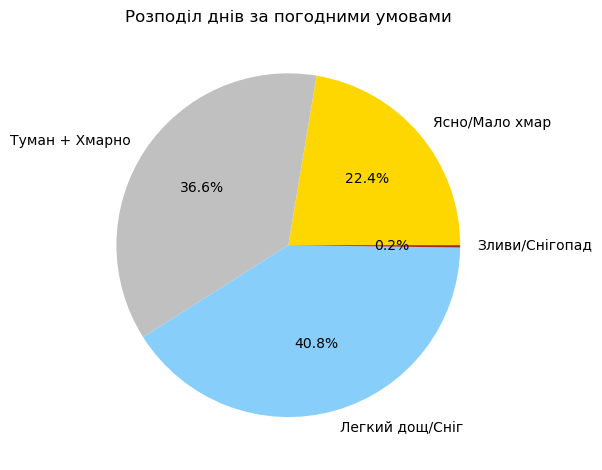

In [13]:
weather_labels = {
    1: 'Ясно/Мало хмар',
    2: 'Туман + Хмарно',
    3: 'Легкий дощ/Сніг',
    4: 'Зливи/Снігопад'
}

weather_colors = {
    'Ясно/Мало хмар': '#FFD700',
    'Туман + Хмарно': '#C0C0C0',
    'Легкий дощ/Сніг': '#87CEFA',
    'Зливи/Снігопад': '#A52A2A'
}

daily_weather = df.groupby(df.index.date)['weather'].max()
weather_counts = daily_weather.value_counts().sort_index()
weather_counts.index = weather_counts.index.to_series().map(weather_labels)

weather_counts.plot.pie(
    #figsize=(8, 8),
    autopct='%1.1f%%',
    labels=weather_counts.index,
    colors=weather_counts.index.map(weather_colors),
    title='Розподіл днів за погодними умовами',
    ylabel=''
);
plt.tight_layout()
plt.show()


**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?

      Легкий дощ та сніг 
2. Чи є дні із сильним дощем? Яка їх частка?
       
      Є але частка лише 0.2% 
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?
      
      
      Хмарна погода навіть з легким дощем чи ясна - сприяє оренді 
      В Сильний дощ чи сніг не дуже зручно їздити та може бути небезпечно 

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

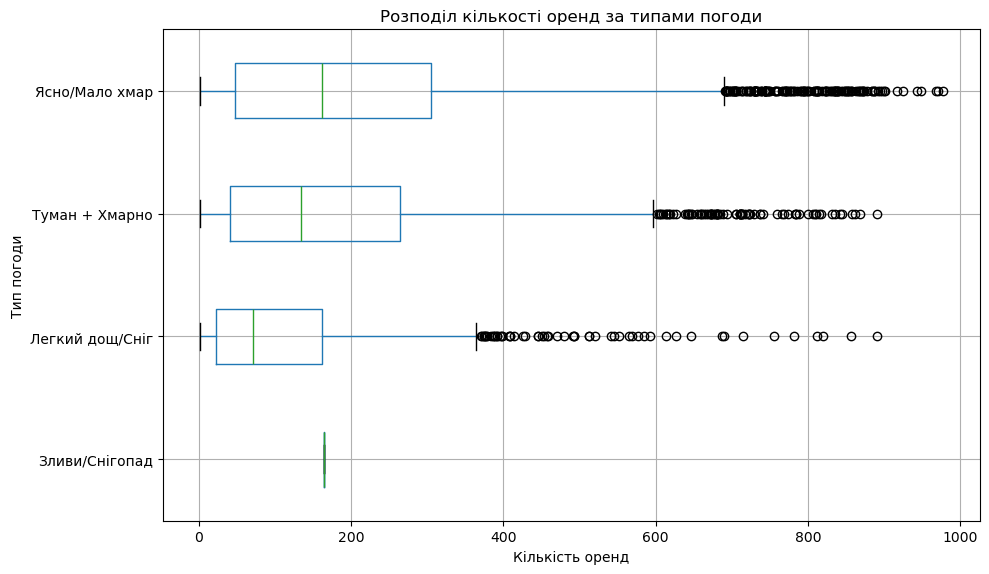

In [14]:


df['weather_label'] = df['weather'].map(weather_labels)

df.boxplot(
    column='count',
    by='weather_label',
    vert=False,
    figsize=(10, 6)
)

plt.title('Розподіл кількості оренд за типами погоди')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Тип погоди')
plt.grid(True)
plt.tight_layout()
plt.show()

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?

    Туман/ Хмарно має найбільний розкид (широкий box plot та довгі вуса)
2. Чи є викиди (outliers) в даних? При якій погоді?ї   

    Викиди спостерігаються при всіх типах погоди, крім Зливи/ Снігопад. Найбільше, туман/хмарно та ясно/мало хмар
    
3. При якій погоді медіанне значення оренди найвище?
   
    Ясно/мало хмар має найвищу медіану 

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

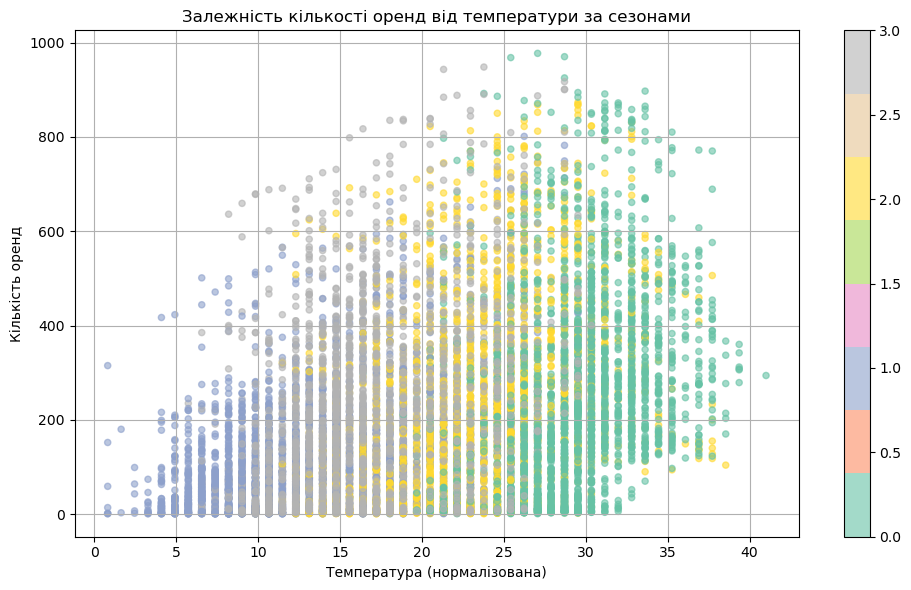

In [15]:
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
df['season_label'] = df['season'].map(season_labels)

# Побудова графіка
ax = df.plot.scatter(
    x='temp',
    y='count',
    c=pd.Categorical(df['season_label']).codes,  # колір за категоріями
    cmap='Set2',
    alpha=0.6,
    figsize=(10, 6)
)

plt.title('Залежність кількості оренд від температури за сезонами')
plt.xlabel('Температура (нормалізована)')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()


**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

Так, є позитивний звязок:
    З підвищенням температури кількість оренд зростає, Пік оренд — приблизно при температурі 25–30°C.



## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

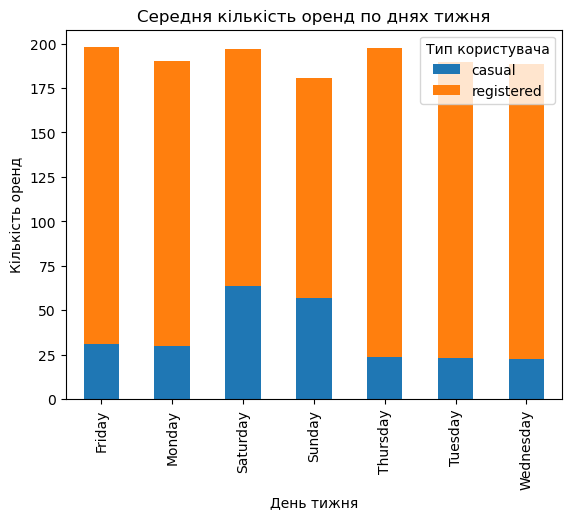

In [16]:
average_by_day = df.groupby('weekday')[['casual', 'registered']].mean()

average_by_day.plot(kind='bar', stacked=True)


plt.title('Середня кількість оренд по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість оренд')
plt.legend(title='Тип користувача')
plt.show()

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?

     У будні дні переважають зареєстровані користувачі (registered).


2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

    Registered, ймовірно, місцеві жителі або працівники, які користуються велосипедами як видном транспорту щоб достатись до роботи чи навчання

    Casual — це можливо туристи або оренда для прогулянок 